In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cpyment import CModel

Here we show an unusual example of how a simple dissipative quantum system can be described by a compartment model. The system we choose is a particle tunneling between two sites, with tunneling constant $J$. The closed version of this system simply has Hamiltonian:

$$
H = \begin{bmatrix}
0 & J \\
J & 0
\end{bmatrix}
$$

and the density matrix evolves following the von Neumann equation (here we're working with units such that $\hbar = 1$):

$$
\frac{\partial \rho}{\partial t} = -i [H,\rho] = -i \begin{bmatrix} J(\rho_{12}^*-\rho_{12}) & J(\rho_{22}-\rho_{11}) \\
J(\rho_{11}-\rho_{22}) & J(\rho_{12}-\rho_{12}^*)
\end{bmatrix}
$$

If we rename the two sites populations $\rho_{11} = P_1$, $\rho_{22} = P_2$ and the imaginary part of the off-diagonal term $\mathrm{Im}(\rho_{12}) = C$, then we get the following equations:

$$
\begin{split}
\frac{\partial P_1}{\partial t} =& -2JC \\
\frac{\partial P_2}{\partial t} =& 2JC \\
\frac{\partial C}{\partial t} =& J(P_1-P_2)
\end{split}
$$

which are easily turned into a compartment system, displaying the expected oscillatory behaviour (coherent tunneling).

In [32]:
J = 1
q_cons = CModel(['P1', 'P2', 'C'])
q_cons.set_coupling_rate('C:P1=>P2', 2*J)
q_cons.set_coupling_rate('P1:=>C', J)
q_cons.set_coupling_rate('P2:C=>', J)

<IPython.core.display.Javascript object>


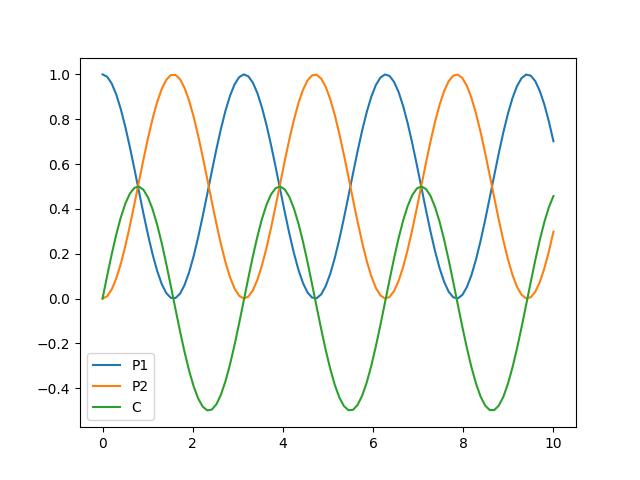

In [33]:
t = np.linspace(0, 10, 100)
sol = q_cons.integrate(t, [1,0,0])

fig, ax = plt.subplots()

for i, s in enumerate(q_cons.states):
    ax.plot(t, sol['y'][:,i], label=s)
    
ax.legend()

To include the effect of dissipation, we add an additional Lindblad term to the master equation. We assume a coupling $\gamma$ to a heat bath that allows incoherent jumping between the two sites.

$$
L = \gamma \left(A_+\rho A_- -\frac{1}{2}\{A_-A_+,\rho\}+A_-\rho A_+ -\frac{1}{2}\{A_+A_-,\rho\}\right)
$$

with

$$
A_+ = \begin{bmatrix}
0 & 1 \\
0 & 0
\end{bmatrix}
\qquad
A_- = \begin{bmatrix}
0 & 0 \\
1 & 0
\end{bmatrix}.
$$

After carrying out the multiplications, we can find that the final equations for our states are

$$
\begin{split}
\frac{\partial P_1}{\partial t} =& -2JC + \gamma(P_2-P_1) \\
\frac{\partial P_2}{\partial t} =& 2JC + \gamma(P_1-P_2) \\
\frac{\partial C}{\partial t} =& J(P_1-P_2) - \gamma C
\end{split}
$$

In [34]:
J = 1
gamma = 0.3
q_dissip = CModel(['P1', 'P2', 'C'])
q_dissip.set_coupling_rate('C:P1=>P2', 2*J)
q_dissip.set_coupling_rate('P1:=>C', J)
q_dissip.set_coupling_rate('P2:C=>', J)
q_dissip.set_coupling_rate('P1:P1=>P2', gamma)
q_dissip.set_coupling_rate('P2:P2=>P1', gamma)
q_dissip.set_coupling_rate('C:C=>', gamma)

<IPython.core.display.Javascript object>


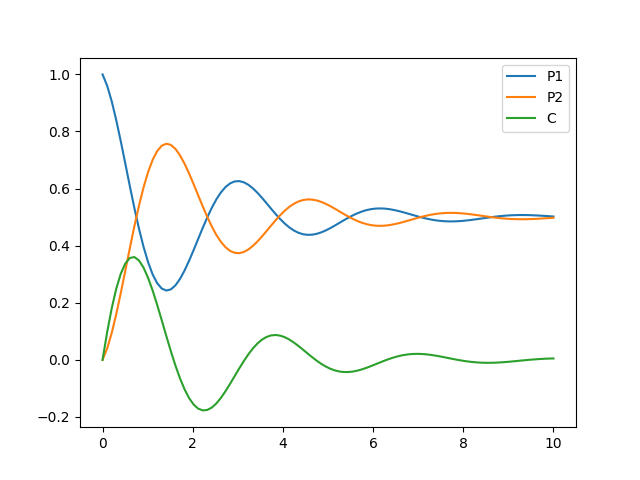

In [35]:
t = np.linspace(0, 10, 100)
sol_d = q_dissip.integrate(t, [1,0,0])

fig, ax = plt.subplots()

for i, s in enumerate(q_dissip.states):
    ax.plot(t, sol_d['y'][:,i], label=s)
    
ax.legend()